# Vegetation and Redlining in Queens, New York

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

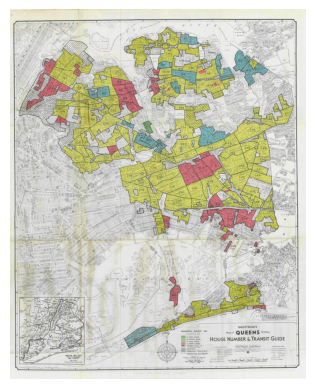

In [8]:
img = mpimg.imread('redliningqueens.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

<a href='https://rayortigas.github.io/cs171-inequality-in-nyc/'> Map source </a>

## Introduction

Queens is the easternmost and largest by area of the five boroughs of New York City ([Ny.gov](https://www.ny.gov/counties/queens)). This borough is home to a mixing pot of cultures, and is actually ranked the most racially diverse borough in all of New York City ([Ny.gov](https://www.ny.gov/counties/queens)). However, much like other major metropolitan areas of the United States, all the boroughs of New York City continue to feel the effects of historical racism and redlining of neighborhoods during the Great Depression (Swope et al., 2022). Redlining was the practice of mortgage lenders drawing red lines around neighborhoods in which they did not want to make loans, and perceived certain neighborhoods to be higher risk than others. This practice largely impacted low-income and racially diverse communities, namely African Americans but also other foreign immigrants. The legacy of redlining persists in many areas around the country, and has been seen to be correlated with higher rates of respiratory illnesses, heat related issues, lower mental health, decreased tree cover, and lower quality educational programs (Swope et al., 2022; Lukes & Cleveland, 2021).

For this analysis, I wanted to test whether tree cover/vegetation health was correlated with historical redlining grades where I grew up - Queens, NYC. Prior studies have found that historically redlined neighborhoods have lower tree cover and less access to public parks, and so the focus of this analysis was to see if these trends extended to the most diverse borough of NYC. 

## Data Description

Redlining data for Queens, NY was downloaded from the <a href='https://dsl.richmond.edu/panorama/redlining/data' > University of Richmond. </a> This vector data includes historical redlining grades determined by the Home Owners' Loan Corporation in 1935-1940 for different zones in Queens. The grades are from A-D, where A was considered the "best" neighborhoods, while D graded neighborhoods were deemed "hazardous," largely due to African Americans and other "less desirable" populations living in these neighborhoods (Mitchell & Franco, 2018). 

Data to understand vegetation health in Queens was downloaded as multispectral raster data from the [Harmonized Landsat Sentinel 30m dataset](https://lpdaac.usgs.gov/products/hlsl30v002/) (HLSL30), which is a combination of data taken by the NASA Landsat missions and the European Space Agency (ESA) Sentinel-2 mission. Data was downloaded from August 31, 2023, as this day provided clear multispectral data with limited cloud cover. This data included Near-Infrared (NIR), red, green, and blue bands, which can provide robust information on the amount of trees and vegetation health in an area. 

## Methods Description

For detailed code and analysis methods please see the full notebook: <a href="Queens-analysis.ipynb"> Queens-analysis.ipynb</a>

Briefly, I defined my study area of Queens, NY and downloaded multispectral raster data for this region (see data description above). I then removed cloud shadows from that satellite data by defining a cloud mask function, which then removed all pixels that included clouds, cloud shadows, were adjacent to clouds, and were water. I then extracted and defined spectral bands from the downloaded data (red, green, blue, NIR). I calculated normalized difference vegetation index (NDVI), which provides information about vegetation health in an area, using the NIR and red spectral band data. I summarized NDVI data across redlining geographic areas by calculating zonal stats for each redlining zone and then plotting the two datasets (NDVI and redlining grade) next to each other. I then used a Decision Tree Classifier model with a depth of 2 to test whether there are correlations with current NDVI metrics and historical redlining grades in Queens NY. K-fold cross-validation was used to evaluate model performance, and historical redlining grades were predicted for each region using NDVI and the model's predictions.  

## Historically redlined zones in Queens, NY do not appear to have lower NDVI today

<embed type="html" src = "fig1.html" width= "800" height="600">

These two maps show NDVI (left, green) and historic redlining grades (right, blue) for different zones of Queens NY. Generally, there is not a lot of variation in NDVI across all of Queens, with one zone having much higher NDVI than the others (where a large public park is located). The redlining grades usually range from A-D, where A was considered "most desirable" while D was considered "undesirable". The redlining map on the right indicates that no zone in Queens was ranked "most desirable", likely because Queens, NY has historically been populated mostly by immigrants from all backgrounds and cultures. Most zones in Queens were graded as "C" (deemed "declining" by the HOLC), with a few zones classified as "D" closer to major highways and JFK airport, and the few "B" zones occurring in North Queens closer to the Long Island Sound. Visually, the two maps do not provide strong evidence that historic redlining correlates with current day vegetation health in the region, likely due to the two variables being fairly homogenous across the borough. 

## NDVI does not provide accurate predictions of historic redlining grades in Queens, NY

<embed type="html" src = "fig2.html" width= "800" height="600">

These two maps provide model predictions of historic redlining grades using NDVI. While the Decision Tree Classifier model did indicate that NDVI and redlining grades were significantly correlated (k-fold cross validation: 65-69%), the maps above show that the predictions of redlining grades are fairly homogenous across the zones, where almost all zones were predicted to have a "C" grade, with just 4 zones predicted to have a "B" grade (map on right). The model predictions failed to capture most of the zones that were not historically graded as "C", which is indicated in the map on the left which indicate the errors in the model predictions and the real data. These poor predictions are likely driven by Queens not having a lot of variability in NDVI and redlining grades to begin with, as well as the Decision Tree Classifier model not providing the best fit to the data. 

Future studies should examine whether redlining grades and NDVI are correlated across all five boroughs of New York City, as Queens only provides a narrow range of redlining grades. Explaining the analysis to all of NYC could provide further insight and context about how historical racism influences the health and resources of current communities residing in NYC. 

## Citations

Lukes, D., & Cleveland, C. (2021). The lingering legacy of redlining on school funding, diversity, and performance. Annenberg Institute for School Reform, 10.

Masek, J., Ju, J., Roger, J., Skakun, S., Vermote, E., Claverie, M., Dungan, J., Yin, Z., Freitag, B., Justice, C. (2021). <i>HLS Operational Land Imager Surface Reflectance and TOA Brightness Daily Global 30m v2.0</i> [Data set]. NASA EOSDIS Land Processes Distributed Active Archive Center.  <https://doi.org/10.5067/HLS/HLSL30.002>

Mitchell, B., & Franco, J. (2018). HOLC “redlining” maps: The persistent structure of segregation and economic inequality. <http://arks.princeton.edu/ark:/88435/dsp01dj52w776n>

Nelson, Robert K, and LaDale Winling. 2023. “Mapping Inequality: Redlining in New Deal America.” In *American Panorama: An Atlas of United States History*, edited by Robert K Nelson and Edward L. Ayers. <https://dsl.richmond.edu/panorama/redlining.>

Swope, C. B., Hernández, D., & Cushing, L. J. (2022). The relationship of historical redlining with present-day neighborhood environmental and health outcomes: a scoping review and conceptual model. Journal of Urban Health, 99(6), 959-983.
